In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Importing and PreProcessing the Data**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Normalize pixel values to range between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels into one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Data Augmentation**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
datagen.fit(x_train)

## **Network Architecture Design**

In [ ]:
# Create the feedforward neural network model
def create_ffnn_model():
    model = models.Sequential()

    # Input Layer
    model.add(layers.Flatten(input_shape=(32, 32, 3)))  # Flatten input

    # Hidden Layers
    model.add(layers.Dense(512, activation='relu'))  # First hidden layer
    model.add(layers.Dense(256, activation='relu'))  # Second hidden layer

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

    return model

# Create and compile the model
model = create_ffnn_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

**Input Layer:** Flattening the 32x32x3 images for a fully connected layer setup. Converting the image into a 1D array.

**Hidden Layers:** Two fully connected layers:
* 512 and 256 neurons: Large layers help capture complex patterns.
* ReLU activation is chosen because it helps solve the vanishing gradient problem.

**Output Layer:** 10 neurons with Softmax activation to get class probabilities.

## **Activation Functions:**

**ReLU (Rectified Linear Unit):**

Chosen for hidden layers as it is computationally efficient and avoids the vanishing gradient problem by setting all negative values to zero.
In backpropagation, ReLU helps by preserving gradients, especially in deeper networks, which makes learning faster.

**Tanh:**

Could also be used for hidden layers because it outputs values between -1 and 1, which is more useful for centered distributions.

Unlike sigmoid, tanh avoids saturation and is often better for hidden layers in networks with smaller datasets or fewer layers.

**Role in Backpropagation:**

* Activation functions are critical for introducing non-linearity, enabling the network to learn complex mappings.
* During backpropagation, they impact how gradients are propagated through the network.
* ReLU makes backpropagation more efficient because its gradient is 1 for positive inputs and 0 for negative inputs.

## **Loss Function and Optimizer**

**Loss Functions:**

**Categorical Cross-Entropy:** The standard for multi-class classification problems, as it measures the difference between the predicted probability distribution and the true distribution (one-hot encoded labels).

**Mean Squared Error (MSE):** Less common in classification, but still a valid loss function. It computes the average of the squared differences between predicted probabilities and true labels.

**Hinge Loss:** Commonly used for "maximum-margin" classification, particularly in support vector machines (SVM), but can be adapted to neural networks.

**Optimizer:**

**Adam (Adaptive Moment Estimation):**
* Chosen because it combines the benefits of both RMSprop and SGD with momentum, making it efficient and robust.
* It adjusts learning rates adaptively, which helps optimize complex models faster.

**Impact of Learning Rate:**
* The learning rate controls the step size during optimization. If too large, the model may fail to converge or oscillate. If too small, convergence will be very slow.
* If the model is not converging, you can reduce the learning rate to ensure smaller steps in the gradient descent process, allowing finer adjustments to the weights.

## **Training the Model**

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=35, validation_data=(x_test, y_test))

Epoch 1/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7397 - loss: 0.7505 - val_accuracy: 0.7701 - val_loss: 0.6772
Epoch 2/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7456 - loss: 0.7401 - val_accuracy: 0.7717 - val_loss: 0.6582
Epoch 3/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7424 - loss: 0.7420 - val_accuracy: 0.7492 - val_loss: 0.7815
Epoch 4/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.7454 - loss: 0.7358 - val_accuracy: 0.7987 - val_loss: 0.5891
Epoch 5/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.7460 - loss: 0.7425 - val_accuracy: 0.7741 - val_loss: 0.6654
Epoch 6/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.7445 - loss: 0.7311 - val_accuracy: 0.7841 - val_loss: 0.6513
Epoch 7/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.7463 - loss: 0.7258 - val_accuracy: 0.7801 - val_loss: 0.6480
Epoch 8/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.7512 - loss: 0.7245 - 

## **Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

print(classification_report(y_true, y_pred_classes))

print(confusion_matrix(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1000
           1       0.93      0.90      0.91      1000
           2       0.86      0.55      0.67      1000
           3       0.75      0.47      0.58      1000
           4       0.76      0.72      0.74      1000
           5       0.83      0.57      0.68      1000
           6       0.51      0.97      0.67      1000
           7       0.83      0.83      0.83      1000
           8       0.85      0.91      0.88      1000
           9       0.82      0.92      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.79      0.77      0.76     10000
weighted avg       0.79      0.77      0.76     10000

[[824  15  11   6  17   0  17   9  62  39]
 [  5 900   0   1   2   0  12   0  14  66]
 [ 75   2 554  22  59  31 204  32  11  10]
 [ 22   7  24 468  53  66 270  28  28  34]
 [ 12   0  19  14 719   3 20

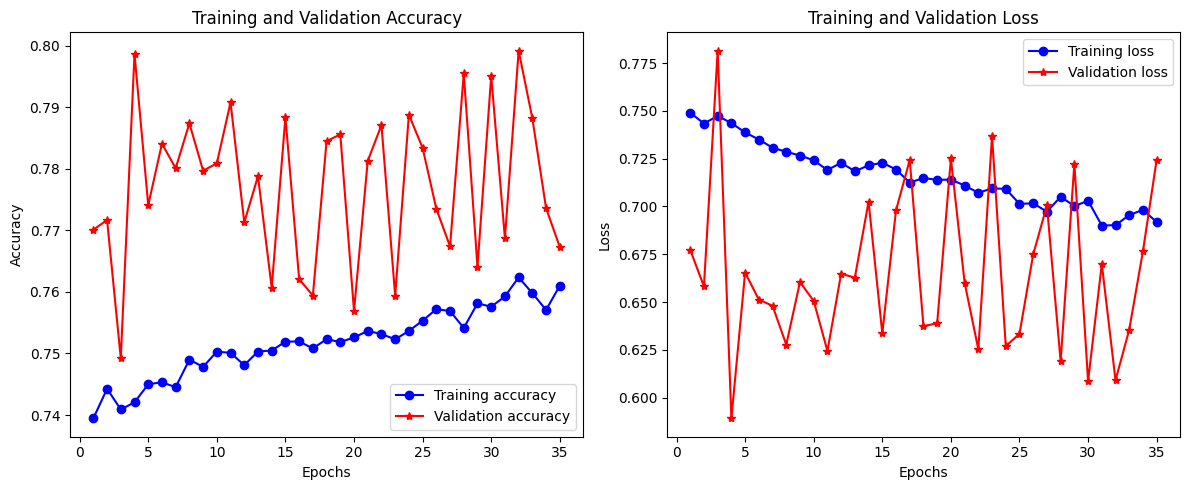

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


## **Optimization Strategies**

**Early Stopping:** Monitor validation loss and stop training when it stops improving to prevent overfitting.

**Learning Rate Scheduling:** Gradually reduce the learning rate during training for smoother convergence.

**Weight Initialization:** Helps the model start training effectively. For instance, He initialization is good for ReLU activations as it keeps the gradients well-scaled.

**Why Weight Initialization Matters:**

* Poor weight initialization can cause vanishing or exploding gradients, which hampers convergence.
* Good initialization e.g., Xavier or He initialization ensures that the variance of the outputs of each layer remains consistent, leading to faster and more stable training.
